# LOADING THE DATASET

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset from the UCI repository
data_url = 'https://archive.ics.uci.edu/static/public/891/data.csv'
data = pd.read_csv(data_url)

# Display the first few rows of the dataset
print(data.head())

   ID  Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0   0                0       1         1          1   40       1       0   
1   1                0       0         0          0   25       1       0   
2   2                0       1         1          1   28       0       0   
3   3                0       1         0          1   27       0       0   
4   4                0       1         1          1   24       0       0   

   HeartDiseaseorAttack  PhysActivity  ...  AnyHealthcare  NoDocbcCost  \
0                     0             0  ...              1            0   
1                     0             1  ...              0            1   
2                     0             0  ...              1            1   
3                     0             1  ...              1            0   
4                     0             1  ...              1            0   

   GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  
0        5        18      

In [ ]:
# Summary statistics of numerical columns
print(data.describe())

                  ID  Diabetes_binary         HighBP       HighChol  \
count  253680.000000    253680.000000  253680.000000  253680.000000   
mean   126839.500000         0.139333       0.429001       0.424121   
std     73231.252481         0.346294       0.494934       0.494210   
min         0.000000         0.000000       0.000000       0.000000   
25%     63419.750000         0.000000       0.000000       0.000000   
50%    126839.500000         0.000000       0.000000       0.000000   
75%    190259.250000         0.000000       1.000000       1.000000   
max    253679.000000         1.000000       1.000000       1.000000   

           CholCheck            BMI         Smoker         Stroke  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.962670      28.382364       0.443169       0.040571   
std         0.189571       6.608694       0.496761       0.197294   
min         0.000000      12.000000       0.000000       0.000000   
25%         1.0

In [ ]:
# Count of missing values in each column
print(data.isnull().sum())

ID                      0
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


# Histograms for each Parameter

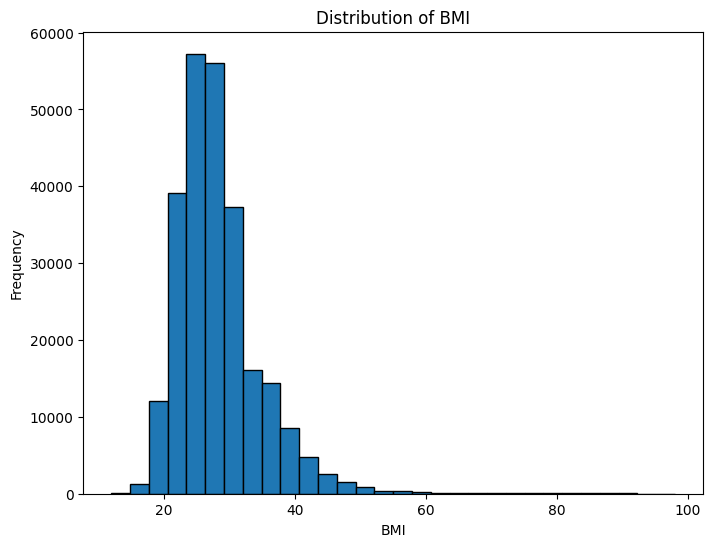

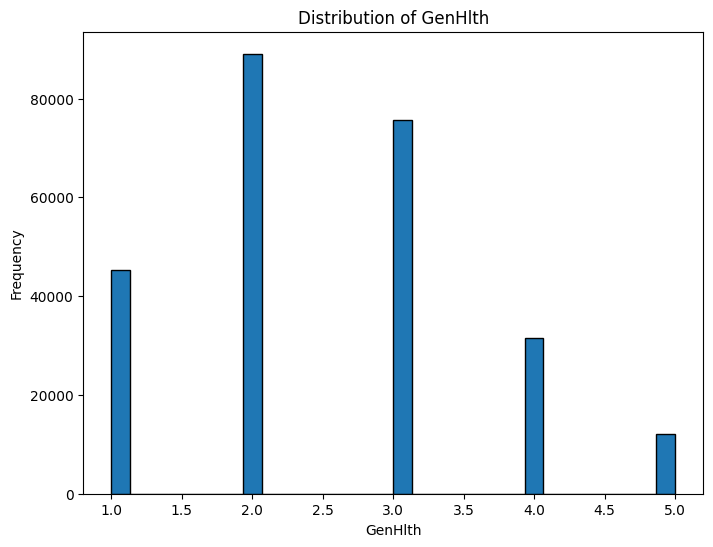

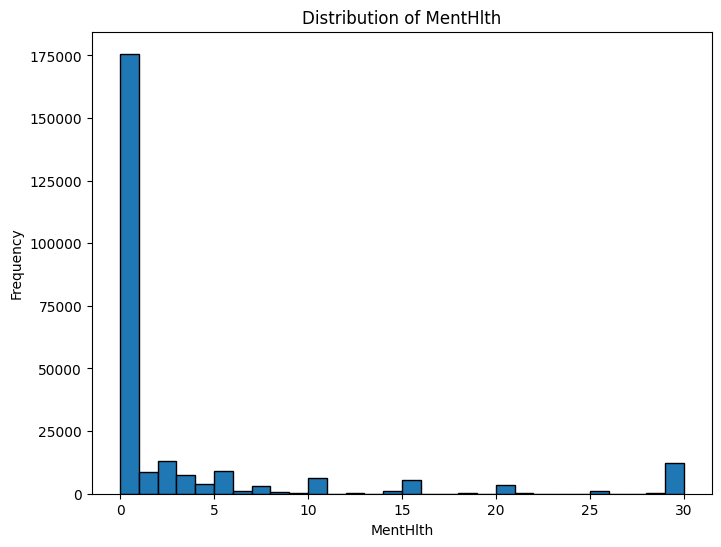

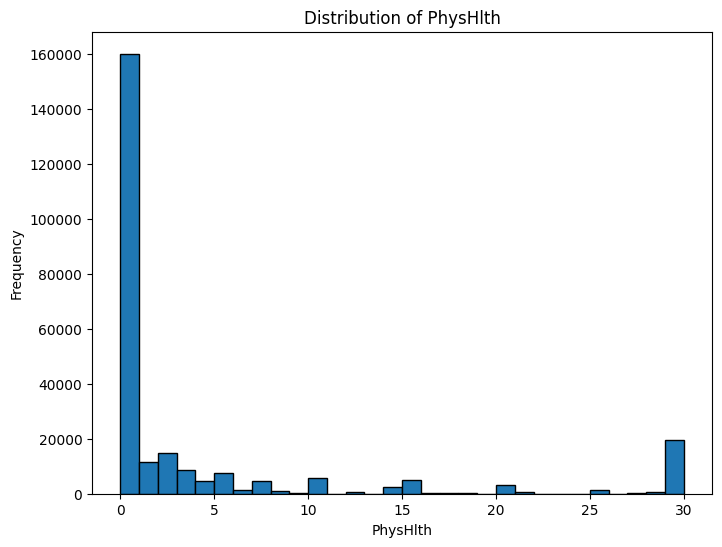

In [ ]:
def plot_histogram(df, column_name):
    """
    Plot histogram for a specified column in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to plot.
    """
    plt.figure(figsize=(8, 6))
    df[column_name].hist(bins=30, edgecolor='black')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

# List of columns to plot
columns_to_plot = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth']

# Plot histograms for each column
for column in columns_to_plot:
    if column in data.columns:
        plot_histogram(data, column)
    else:
        print(f'Column {column} not found in the DataFrame')

# Detecting Outliers using Box-Plot

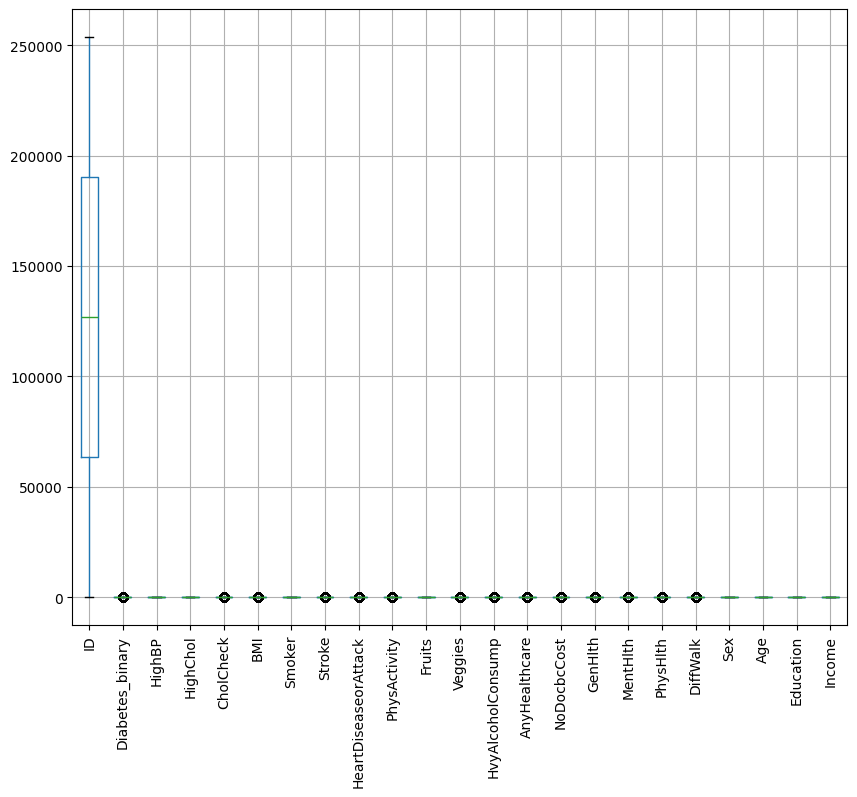

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data_url = 'https://archive.ics.uci.edu/static/public/891/data.csv'
data = pd.read_csv(data_url)

# Box plot for all numerical columns
data.boxplot(figsize=(10, 8))
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

Outliers per column before handling:
ID                          0
Diabetes_binary         35346
HighBP                      0
HighChol                    0
CholCheck                9470
BMI                      9847
Smoker                      0
Stroke                  10292
HeartDiseaseorAttack    23893
PhysActivity            61760
Fruits                      0
Veggies                 47839
HvyAlcoholConsump       14256
AnyHealthcare           12417
NoDocbcCost             21354
GenHlth                 12081
MentHlth                36208
PhysHlth                40949
DiffWalk                42675
Sex                         0
Age                         0
Education                   0
Income                      0
dtype: int64
Total number of outliers before handling: 378387


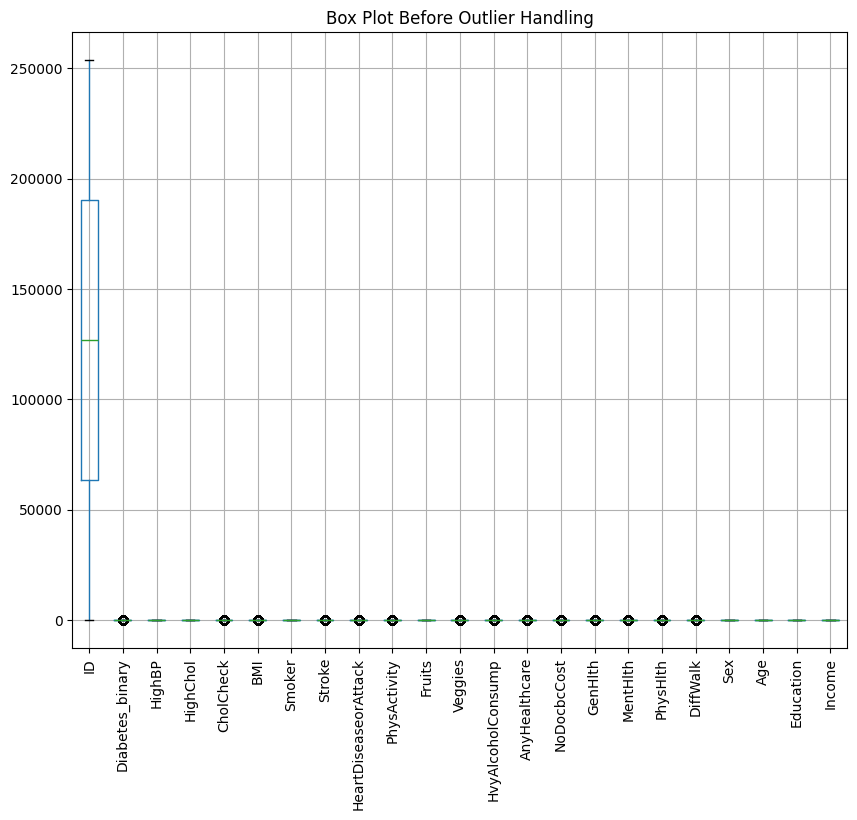

In [ ]:
# Select numerical columns
numerical_data = data.select_dtypes(include=['number'])

# Calculate Q1, Q3, and IQR
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1

# Detect outliers before handling
outliers_before = ((numerical_data < (Q1 - 1.5 * IQR)) | (numerical_data > (Q3 + 1.5 * IQR))).sum()
print("Outliers per column before handling:")
print(outliers_before)
print("Total number of outliers before handling:", outliers_before.sum())

# Box plot for all numerical columns before handling
numerical_data.boxplot(figsize=(10, 8))
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Box Plot Before Outlier Handling')
plt.show()

# Box-Plot after Outlier Handling

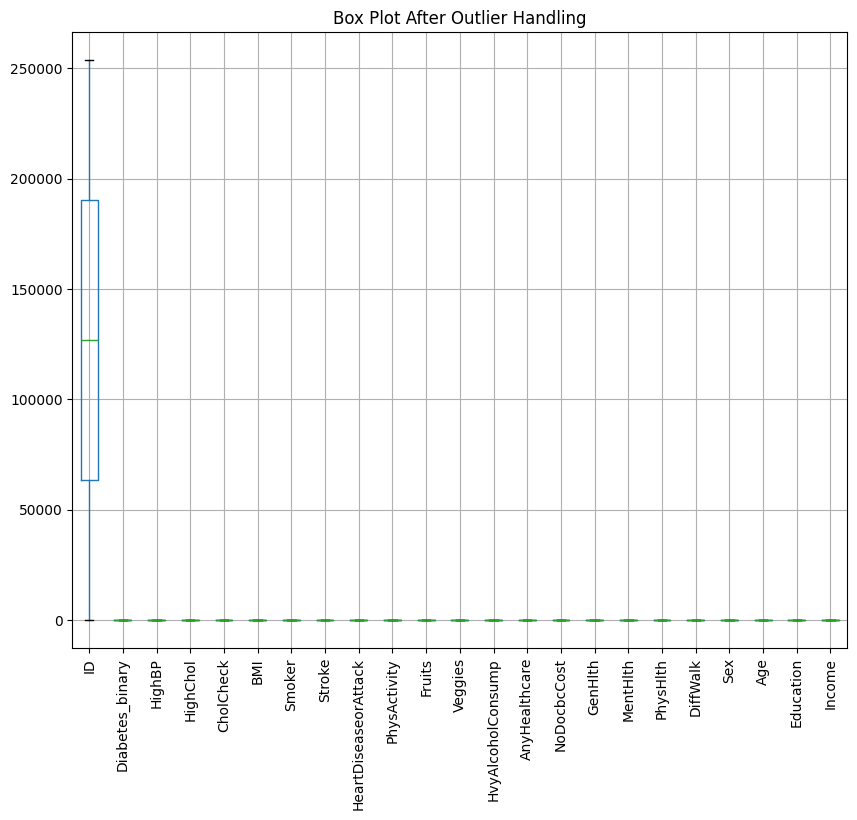

In [ ]:
# Define the lower and upper bounds for capping
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply capping
capped_data = numerical_data.clip(lower=lower_bound, upper=upper_bound, axis=1)

# Box plot after capping
capped_data.boxplot(figsize=(10, 8))
plt.xticks(rotation=90)
plt.title('Box Plot After Outlier Handling')
plt.show()

In [ ]:
# Detect outliers after handling
outliers_after = ((capped_data < (Q1 - 1.5 * IQR)) | (capped_data > (Q3 + 1.5 * IQR))).sum()
print("Outliers per column after handling:")
print(outliers_after)
print("Total number of outliers after handling:", outliers_after.sum())

Outliers per column after handling:
ID                      0
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Total number of outliers after handling: 0


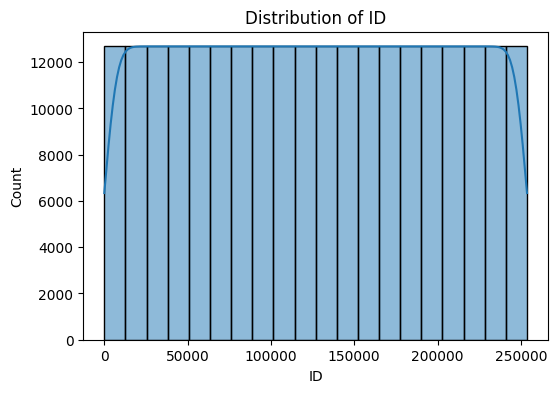

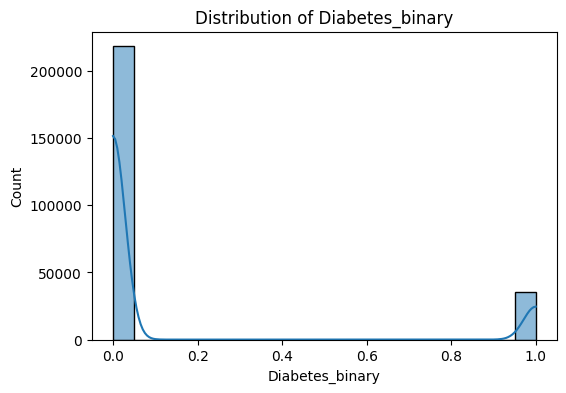

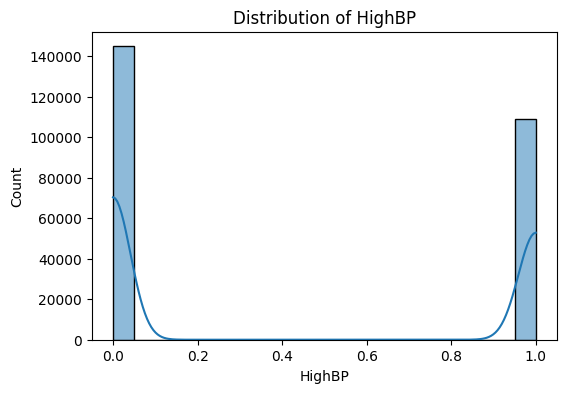

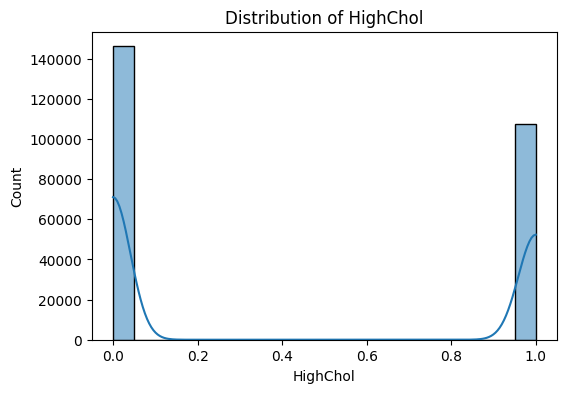

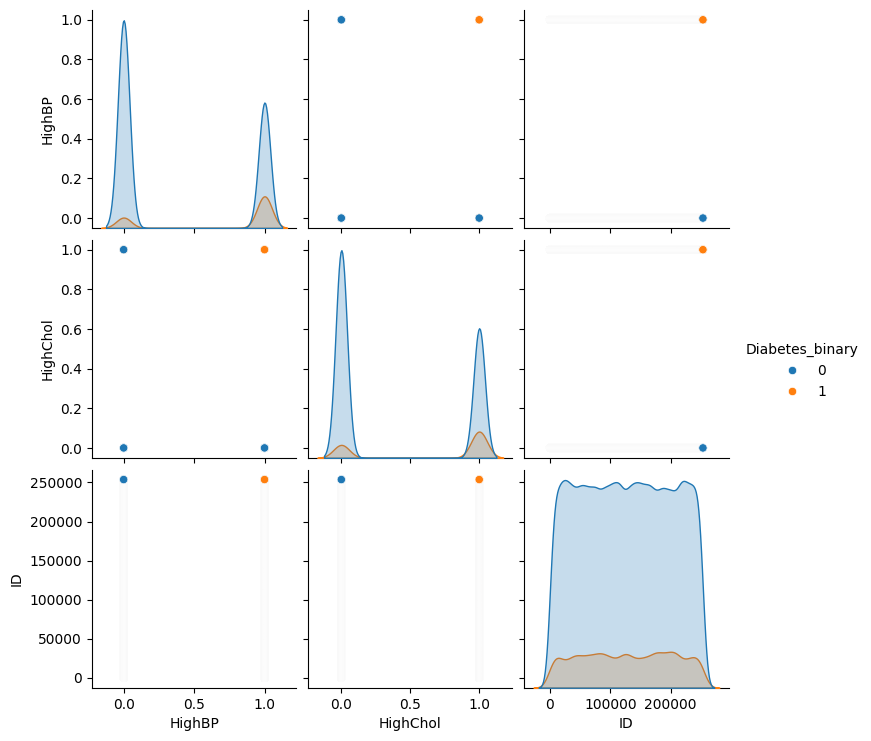

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting a subset of numeric features (3-4 features)
subset_features = data.select_dtypes(include=np.number).columns[:4]

# Distribution of selected numeric features
for col in subset_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

# Pairplot for selected features along with the target variable 'Diabetes_binary'
sns.pairplot(data[subset_features.union(['Diabetes_binary'])], hue='Diabetes_binary', diag_kind='kde')
plt.show()

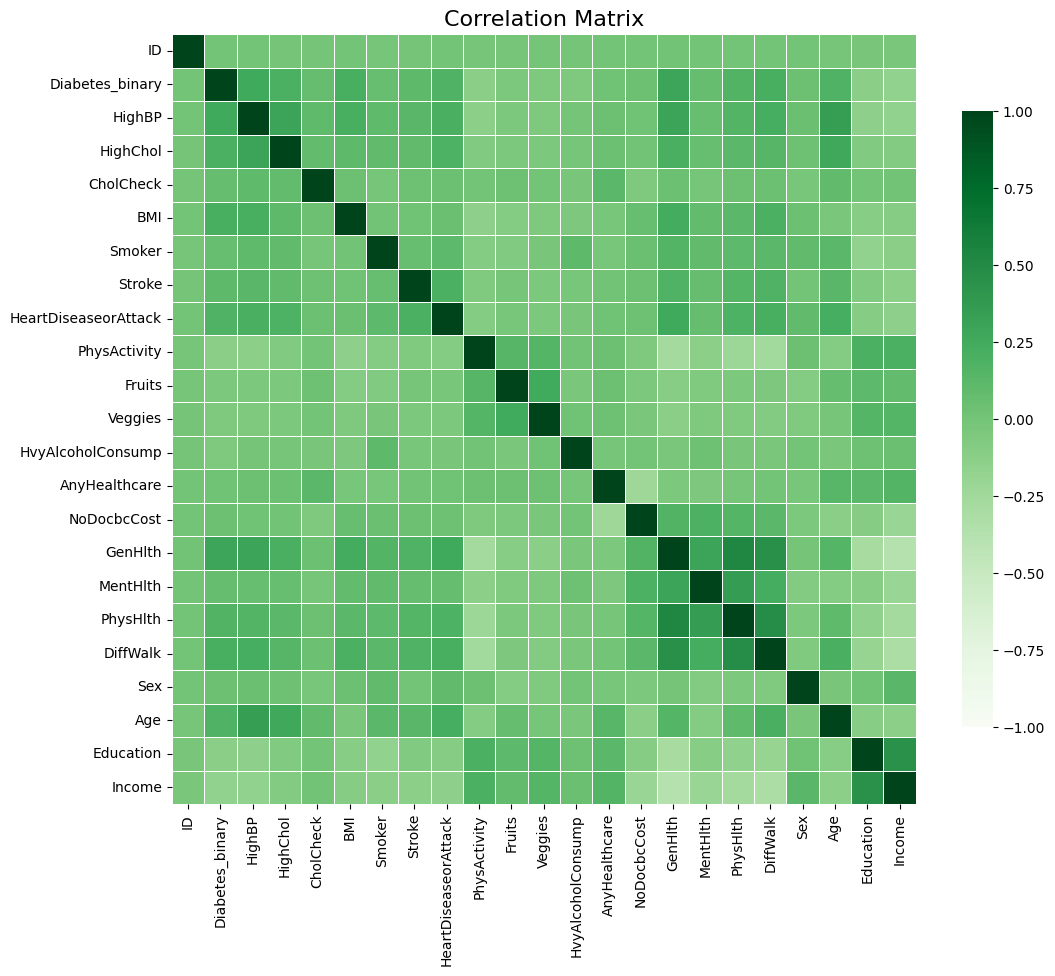

In [ ]:
# Select numerical columns
numerical_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numerical_data.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,
            annot=False,                # Do not annotate cells with correlation values
            cmap='Greens',             # Use green color map
            linewidths=0.5,            # Add lines between cells for clarity
            vmin=-1, vmax=1,           # Set the range of values
            cbar_kws={'shrink': .8}    # Adjust color bar size
           )

# Add title
plt.title('Correlation Matrix', size=16)
plt.show()

# Handling Class Imbalance

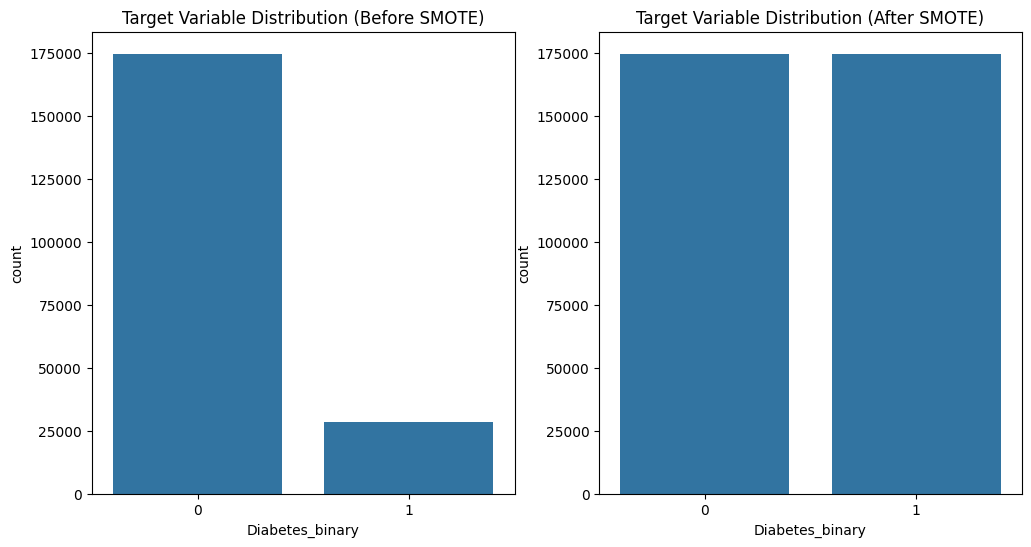

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_url = 'https://archive.ics.uci.edu/static/public/891/data.csv'
data = pd.read_csv(data_url)

# Separate features and target variable
X = data.drop(columns=['Diabetes_binary'])
y = data['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Count plot for the target variable before and after SMOTE
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Target Variable Distribution (Before SMOTE)')

plt.subplot(1, 2, 2)
sns.countplot(x=y_train_smote)
plt.title('Target Variable Distribution (After SMOTE)')

plt.show()

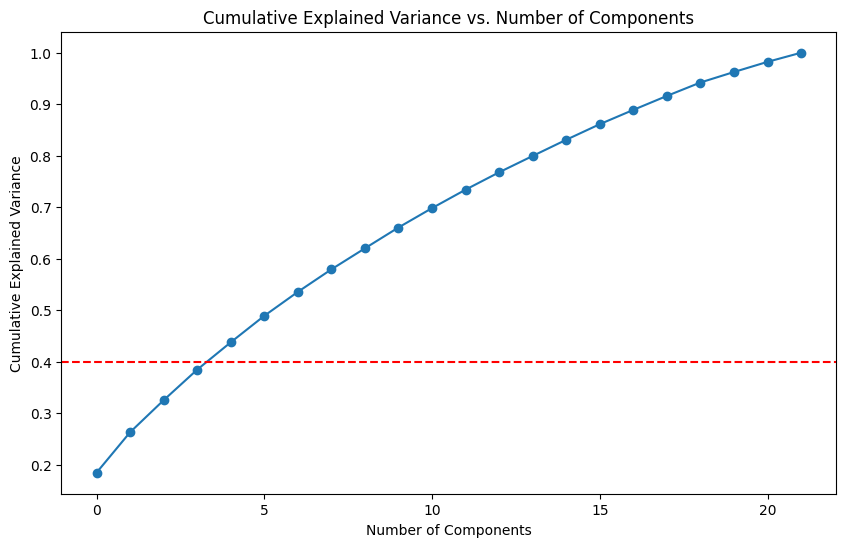

Number of components explaining at least 40% variance: 5
Reduced number of features: 5


In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to the standardized features
pca = PCA()
X_train_pca = pca.fit_transform(X_train_smote)

# Plot cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.axhline(y=0.4, color='r', linestyle='--')
plt.show()

# Select the number of components that explain at least 40% of the variance
n_components = (cumulative_explained_variance >= 0.4).argmax() + 1
print(f"Number of components explaining at least 40% variance: {n_components}")

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_smote)

print(f"Reduced number of features: {X_train_pca.shape[1]}")

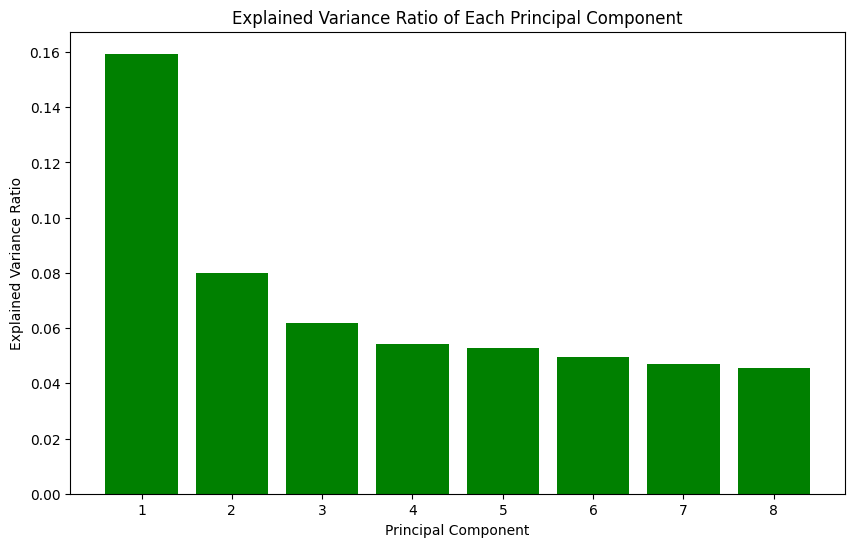

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
data_url = 'https://archive.ics.uci.edu/static/public/891/data.csv'
data = pd.read_csv(data_url)

# Separate features and target variable
X = data.drop(columns=['Diabetes_binary'])
y = data['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to the scaled data and reduce to 8 components
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train_scaled)

# Create a DataFrame with the PCA components and target variable
pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(8)])
pca_df['Diabetes_binary'] = y_train.values

# Plot the explained variance ratio of each component
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.bar(range(1, 9), explained_variance, color='green')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Each Principal Component')
plt.xticks(range(1, 9))
plt.show()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Instantiate the model
log_reg_model = LogisticRegression(max_iter=200)

# Train the model
log_reg_model.fit(X_train, y_train)

# Evaluate the model
y_pred_log_reg = log_reg_model.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")

Logistic Regression Accuracy: 0.8574


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Instantiate the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Random Forest Accuracy: 0.8641


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Instantiate the model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Accuracy
knn_accuracy = accuracy_score(y_test, y_pred_knn)

# Print accuracy
print(f"KNN Accuracy: {knn_accuracy:.4f}")

KNN Accuracy: 0.8507


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


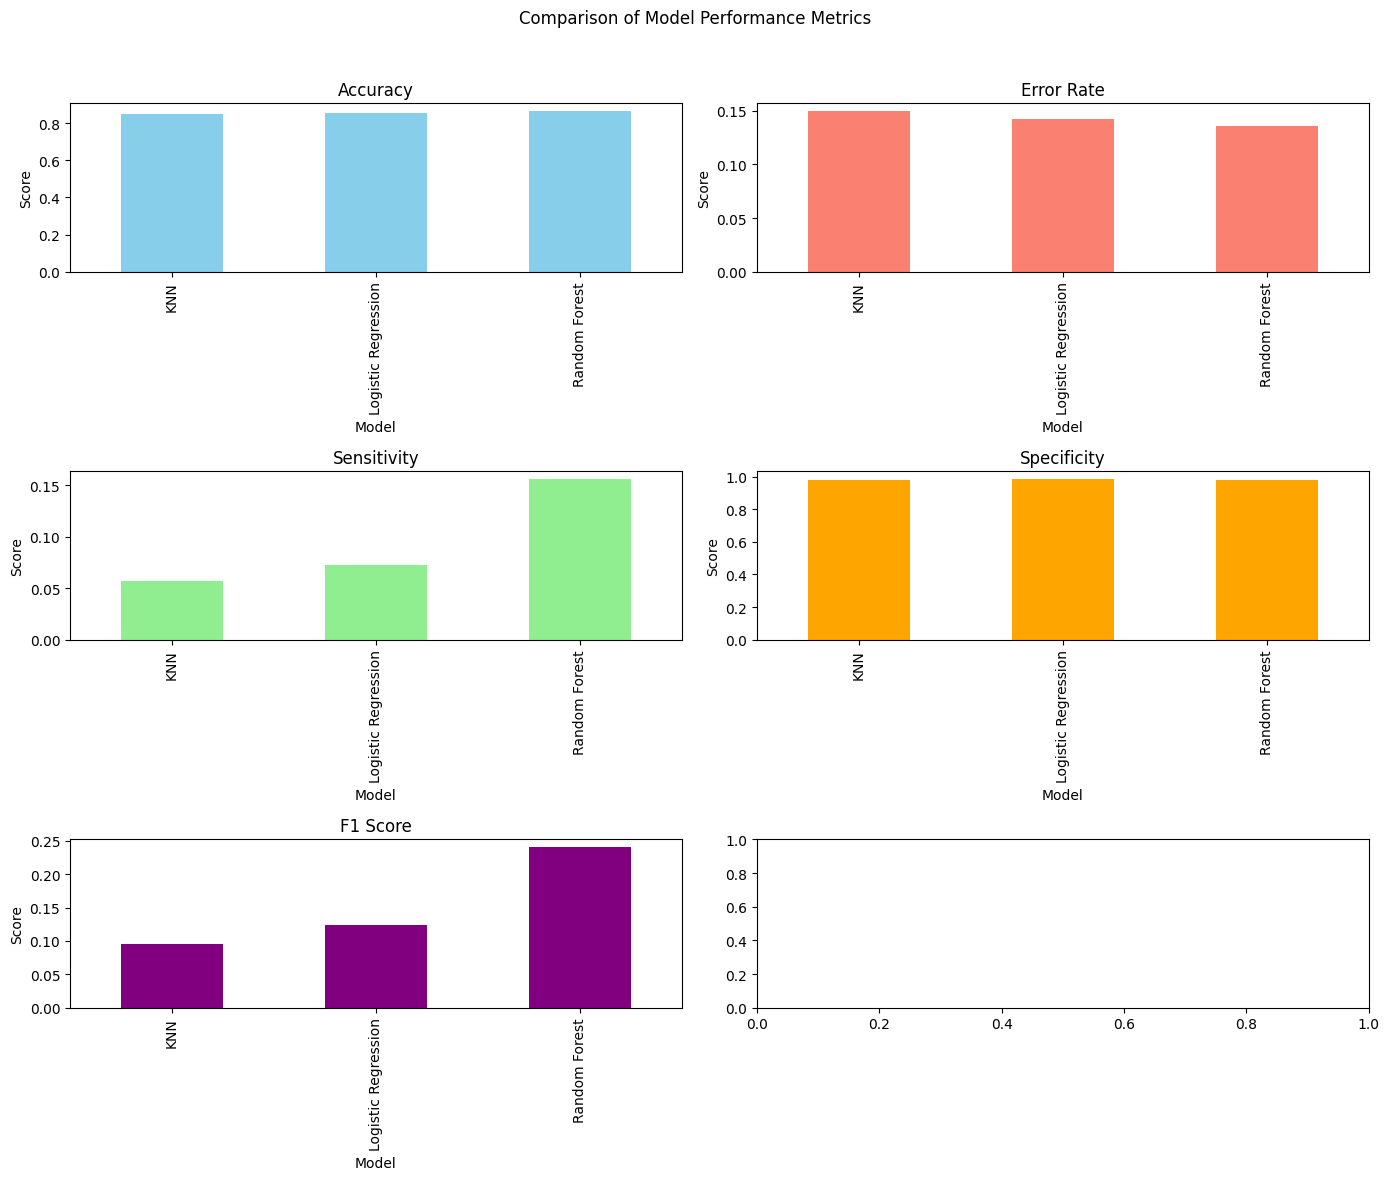

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define a function to calculate model metrics
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    error_rate = 1.0 - accuracy
    sensitivity = metrics.recall_score(y_true, y_pred, average='binary')  # Assuming binary classification
    f1 = f1_score(y_true, y_pred, average='binary')  # F1 score for binary classification
    specificity = calculate_specificity(y_true, y_pred)  # Function to calculate specificity
    return accuracy, error_rate, sensitivity, specificity, f1

# Define a function to calculate specificity
def calculate_specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    return specificity

# Assuming you have already split your dataset into X_train, X_test, y_train, y_test

# Train the models (replace X_train, y_train with your actual training data)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

log_reg_model = LogisticRegression(max_iter=200)
log_reg_model.fit(X_train, y_train)
log_reg_y_pred = log_reg_model.predict(X_test)

# Initialize the dictionary to store results for each model
metrics_data = {
    'Model': ['KNN', 'Logistic Regression', 'Random Forest'],
    'Accuracy': [],
    'Error Rate': [],
    'Sensitivity': [],
    'Specificity': [],
    'F1-score': []
}

# KNN metrics
knn_metrics = calculate_metrics(y_test, knn_y_pred)
metrics_data['Accuracy'].append(knn_metrics[0])
metrics_data['Error Rate'].append(knn_metrics[1])
metrics_data['Sensitivity'].append(knn_metrics[2])
metrics_data['Specificity'].append(knn_metrics[3])
metrics_data['F1-score'].append(knn_metrics[4])

# Logistic Regression metrics
lr_metrics = calculate_metrics(y_test, log_reg_y_pred)
metrics_data['Accuracy'].append(lr_metrics[0])
metrics_data['Error Rate'].append(lr_metrics[1])
metrics_data['Sensitivity'].append(lr_metrics[2])
metrics_data['Specificity'].append(lr_metrics[3])
metrics_data['F1-score'].append(lr_metrics[4])

# Random Forest metrics
rf_metrics = calculate_metrics(y_test, rf_y_pred)
metrics_data['Accuracy'].append(rf_metrics[0])
metrics_data['Error Rate'].append(rf_metrics[1])
metrics_data['Sensitivity'].append(rf_metrics[2])
metrics_data['Specificity'].append(rf_metrics[3])
metrics_data['F1-score'].append(rf_metrics[4])

# Convert to DataFrame for easier manipulation and visualization
results_df = pd.DataFrame(metrics_data)

# Plot each metric separately
results_df.set_index('Model', inplace=True)
fig, ax = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Comparison of Model Performance Metrics')

# Accuracy Plot
results_df['Accuracy'].plot(kind='bar', ax=ax[0, 0], color='skyblue')
ax[0, 0].set_title('Accuracy')
ax[0, 0].set_ylabel('Score')

# Error Rate Plot
results_df['Error Rate'].plot(kind='bar', ax=ax[0, 1], color='salmon')
ax[0, 1].set_title('Error Rate')
ax[0, 1].set_ylabel('Score')

# Sensitivity Plot
results_df['Sensitivity'].plot(kind='bar', ax=ax[1, 0], color='lightgreen')
ax[1, 0].set_title('Sensitivity')
ax[1, 0].set_ylabel('Score')

# Specificity Plot
results_df['Specificity'].plot(kind='bar', ax=ax[1, 1], color='orange')
ax[1, 1].set_title('Specificity')
ax[1, 1].set_ylabel('Score')

# F1-score Plot
results_df['F1-score'].plot(kind='bar', ax=ax[2, 0], color='purple')
ax[2, 0].set_title('F1 Score')
ax[2, 0].set_ylabel('Score')

# Adjust layout for better presentation
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn import metrics

# Define a function to calculate specificity
def calculate_specificity(y_true, y_pred, class_label=0):
    tn, fp, fn, tp = metrics.confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    return specificity

# Assuming your models' predictions are already made and stored in y_pred_knn, y_pred_log_reg, and y_pred_rf
# Replace these variables with your actual predictions
knn_y_pred = knn_model.predict(X_test)  # KNN prediction
log_reg_y_pred = log_reg_model.predict(X_test)  # Logistic Regression prediction
rf_y_pred = rf_model.predict(X_test)  # Random Forest prediction

# Final Comparison Table of Metrics for Each Model
final_results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, knn_y_pred),
        accuracy_score(y_test, log_reg_y_pred),
        accuracy_score(y_test, rf_y_pred)
    ],
    'Error Rate': [
        1 - accuracy_score(y_test, knn_y_pred),
        1 - accuracy_score(y_test, log_reg_y_pred),
        1 - accuracy_score(y_test, rf_y_pred)
    ],
    'Sensitivity (Recall)': [
        recall_score(y_test, knn_y_pred, average='binary'),
        recall_score(y_test, log_reg_y_pred, average='binary'),
        recall_score(y_test, rf_y_pred, average='binary')
    ],
    'Specificity': [
        calculate_specificity(y_test, knn_y_pred, class_label=0),
        calculate_specificity(y_test, log_reg_y_pred, class_label=0),
        calculate_specificity(y_test, rf_y_pred, class_label=0)
    ],
    'F1 Score': [
        f1_score(y_test, knn_y_pred, average='binary'),
        f1_score(y_test, log_reg_y_pred, average='binary'),
        f1_score(y_test, rf_y_pred, average='binary')
    ]
})

# Display final comparison table
print("Final Comparison Table of Model Performance Metrics")
final_results.set_index('Model', inplace=True)
display(final_results)

Final Comparison Table of Model Performance Metrics


,Accuracy,Error Rate,Sensitivity (Recall),Specificity,F1 Score
Model,,,,,
KNN,0.850717,0.149283,0.057453,0.977617,0.095966
Logistic Regression,0.857439,0.142561,0.072603,0.982990,0.123166
Random Forest,0.864081,0.135919,0.155781,0.977389,0.240194
